In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from itertools import combinations
from scipy.stats import ttest_ind
from statsmodels.stats import weightstats
%matplotlib inline

In [2]:
# Предобработка


def get_boxplot(column):
    '''Функция для построения boxplot для категориальных колонок'''
    fig, ax = plt.subplots()
    sns.boxplot(x=column, y='score',
                data=sm.loc[sm.loc[:, column].isin(
                    sm.loc[:, column].value_counts().index[:5])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_stat_dif(column):
    '''Функция для анализа различия между числовыми колонками с уровнем доверия 95%'''
    cols = sm.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(sm.loc[sm.loc[:, column] == comb[0], 'score'],
                     sm.loc[sm.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [3]:
# Считываем датасет
sm = pd.read_csv('stud_math.csv')
sm.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [4]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
sm.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [6]:
# удалим колонку "studytime, granular" с некорректными значениями
del sm['studytime, granular']

In [7]:
sm.describe(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [8]:
pd.DataFrame(sm.school.value_counts())

,school
GP,349
MS,46


In [9]:
pd.DataFrame(sm.sex.value_counts())

,sex
F,208
M,187


In [10]:
pd.DataFrame(sm.address.value_counts())

,address
U,295
R,83


In [11]:
pd.DataFrame(sm.famsize.value_counts())

,famsize
GT3,261
LE3,107


In [12]:
pd.DataFrame(sm.Pstatus.value_counts())

,Pstatus
T,314
A,36


In [13]:
pd.DataFrame(sm.Mjob.value_counts())

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


In [14]:
pd.DataFrame(sm.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


In [15]:
pd.DataFrame(sm.guardian.value_counts())

,guardian
mother,250
father,86
other,28


In [16]:
pd.DataFrame(sm.schoolsup.value_counts())

,schoolsup
no,335
yes,51


In [17]:
pd.DataFrame(sm.famsup.value_counts())

,famsup
yes,219
no,137


In [18]:
pd.DataFrame(sm.paid.value_counts())

,paid
no,200
yes,155


In [19]:
pd.DataFrame(sm.activities.value_counts())

,activities
yes,195
no,186


In [20]:
pd.DataFrame(sm.nursery.value_counts())

,nursery
yes,300
no,79


In [21]:
pd.DataFrame(sm.higher.value_counts())

,higher
yes,356
no,19


In [22]:
pd.DataFrame(sm.internet.value_counts())

,internet
yes,305
no,56


In [23]:
pd.DataFrame(sm.romantic.value_counts())

,romantic
no,240
yes,124


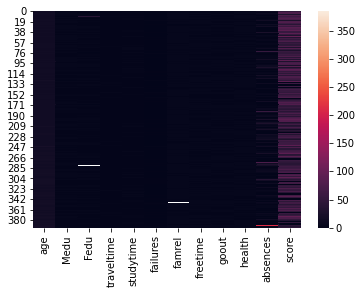

In [24]:
sm_numbers = sm.loc[:, ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
                        'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']]
sns.heatmap(sm_numbers)

In [25]:
sm.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685
health,-0.065946,-0.045051,0.027251,-0.021531,-0.080016,0.081284,0.077474,0.061575,-0.015608,1.000000,-0.016222,-0.070460


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

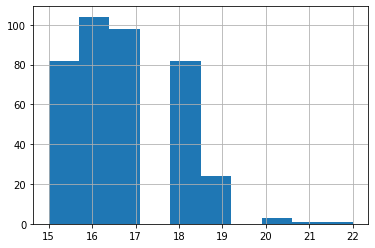

In [26]:
sm.age.hist()
sm.age.describe()

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

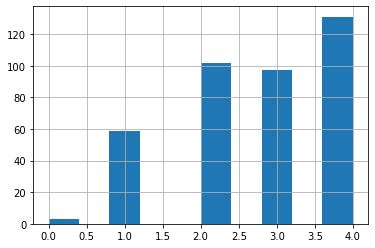

In [27]:
sm.Medu.hist()
sm.Medu.describe()

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

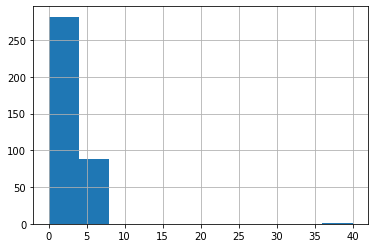

In [28]:
sm.Fedu.hist()
sm.Fedu.describe()

In [29]:
sm = sm[sm.Fedu <= 4]

count    345.000000
mean       1.449275
std        0.701664
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

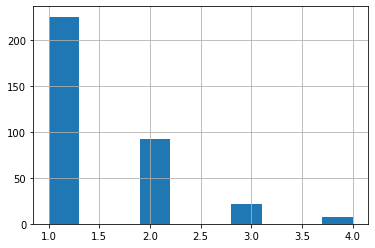

In [30]:
sm.traveltime.hist()
sm.traveltime.describe()

count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

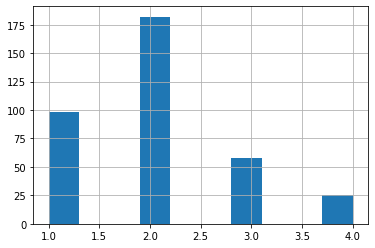

In [31]:
sm.studytime.hist()
sm.studytime.describe()

count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

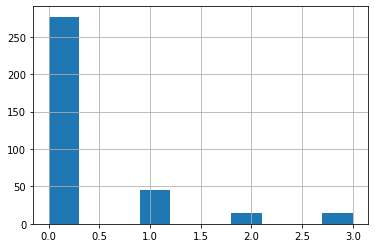

In [32]:
sm.failures.hist()
sm.failures.describe()

count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

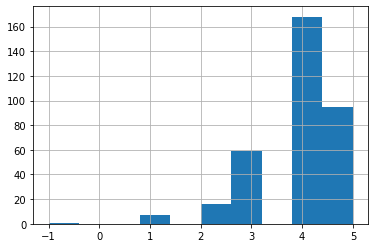

In [33]:
sm.famrel.hist()
sm.famrel.describe()

In [34]:
sm = sm[sm.famrel >= 1]

count    336.000000
mean       3.229167
std        1.003508
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

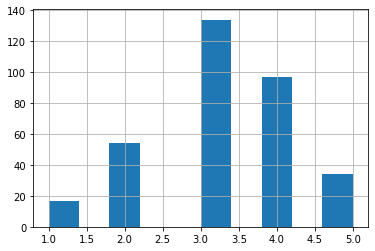

In [35]:
sm.freetime.hist()
sm.freetime.describe()

count    337.000000
mean       3.106825
std        1.104852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

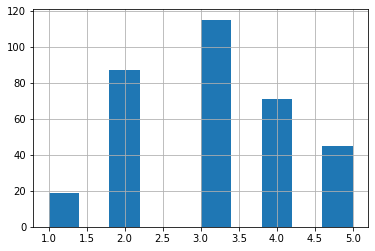

In [36]:
sm.goout.hist()
sm.goout.describe()

count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

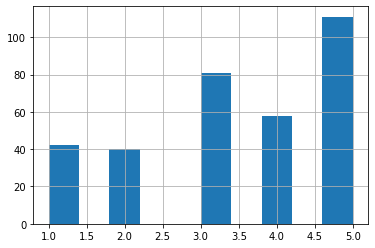

In [37]:
sm.health.hist()
sm.health.describe()

count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

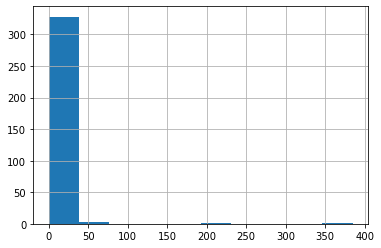

In [38]:
sm.absences.hist()
sm.absences.describe()

In [39]:
# Найдем границы доверительного интервала для колонки absences
IQR = sm.absences.quantile(0.75) - sm.absences.quantile(0.25)
perc25 = sm.absences.quantile(0.25)
perc75 = sm.absences.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


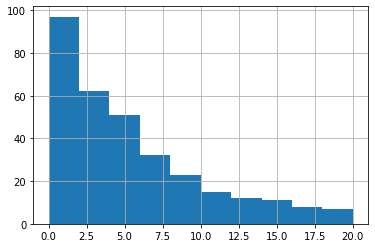

In [40]:
sm = sm[sm.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
sm.absences.hist()

count    313.000000
mean      52.124601
std       22.511546
min        0.000000
25%       45.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

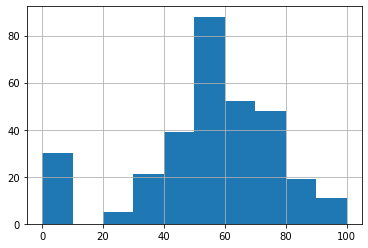

In [41]:
sm.score.hist()
sm.score.describe()

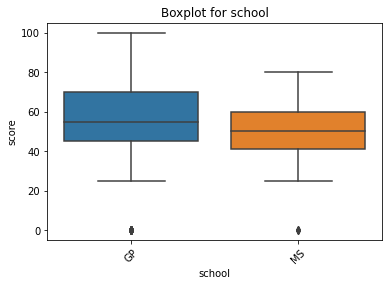

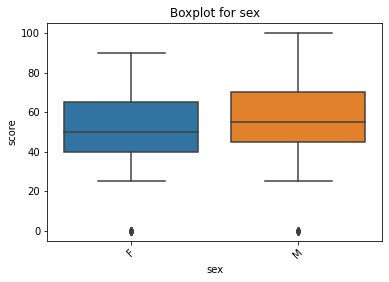

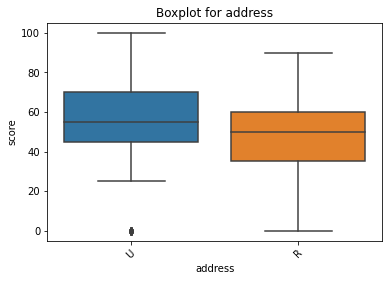

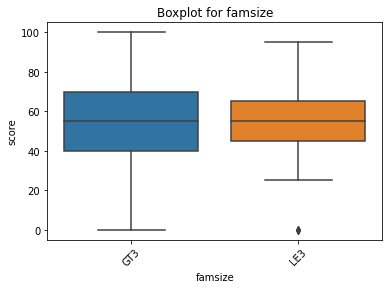

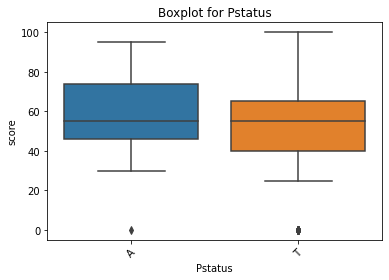

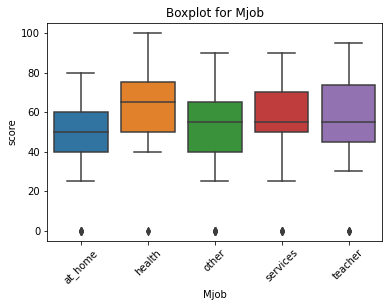

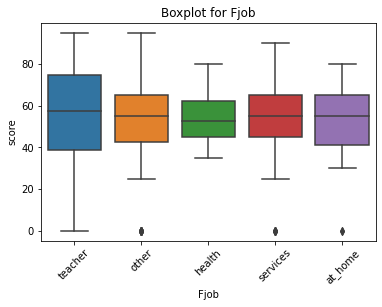

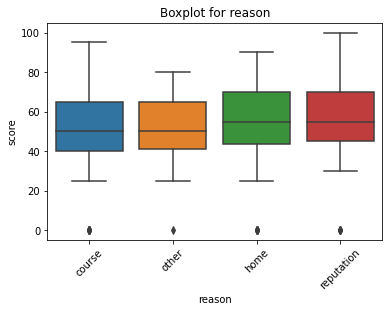

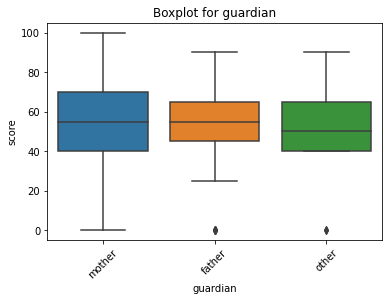

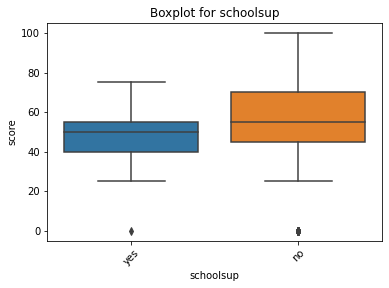

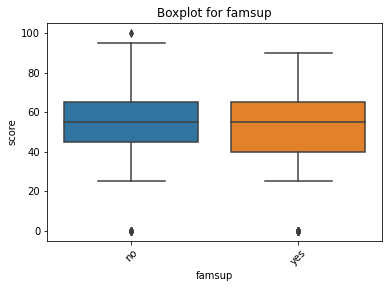

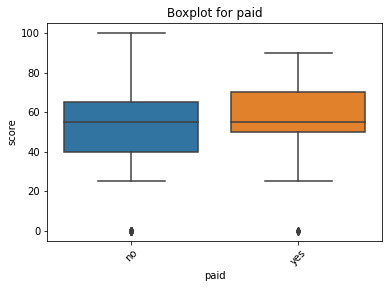

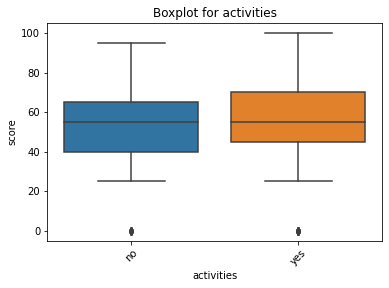

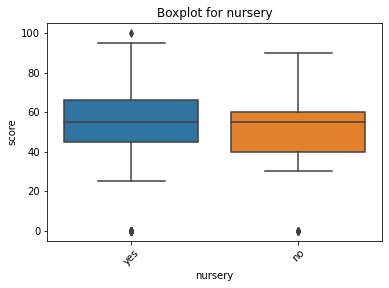

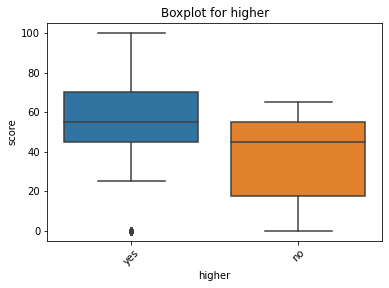

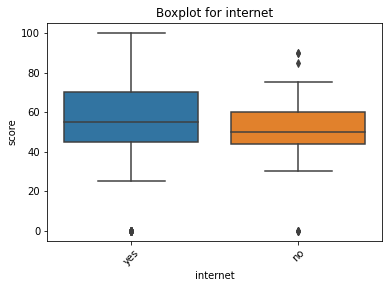

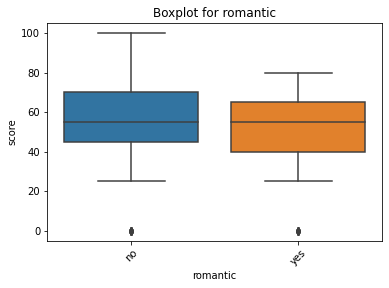

In [42]:
# Построим boxplots для категориальных переменных
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [43]:
# Для проведения анализа на неразличимость данных в категориальных колонках заменим все ячейки Nan на 0
sm.replace(np.nan, 0, inplace=True)
sm.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,0,A,4.0,4.0,at_home,teacher,...,yes,yes,0,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,0,1.0,1.0,at_home,other,...,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,yes,yes,yes,0,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,0,...,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,0,LE3,T,2.0,2.0,other,other,...,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
9,GP,M,15,U,0,0,3.0,4.0,other,other,...,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
10,GP,F,15,U,GT3,T,4.0,4.0,teacher,health,...,yes,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0


In [44]:
# Проведем анализ на неразличимость данных в категориальных колонках
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher


In [45]:
# Получаем следующий датасет для построения модели
sm_for_model = sm.loc[:, ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                          'paid', 'higher', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']]